# Bloch Sphere Over Quantum Channels

The main purpuse of this code is to show the action of different quantum channels over the Bloch Sphere. Usually a quantum state can be written as:

$$ |\psi \rangle = \cos(\theta/2)|0\rangle + e^{i \phi}\sin (\theta/2) |1\rangle  $$

Where $\theta \in [0, \pi]$ and $\phi \in [0, 2\pi]$.

You can represent this quantum state using the Bloch Sphere just because this is a pure quantum state. When your system is subject to external factors, such as noise or external radiation, the quantum state can be a mixed state, which is not longer quantum.  

You can write your quantum state, pure or mixed with a density matrix. For pure states:

$$ \rho = |\psi\rangle \langle \psi | $$

If the quantum state is mixed then.

$$ \rho = \sum_i |\psi_i\rangle \langle \psi_i | $$

After that we can implement a quantum channel using Kraus operators. Which are definied as:

$$ \epsilon (\rho) = \sum_i K_i \rho K_i^{\dagger} $$

The Kraus operators has the following properties, one the most important but not the only one:

$$ \sum_i K_i K_i^{\dagger} = I $$

### More information:

* https://en.wikipedia.org/wiki/Bloch_sphere

* https://quantum.phys.cmu.edu/QCQI/qitd412.pdf


In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Phase Damping

The quantum channel, the Kraus operators, for this channel is represented as:

$$  K_1 = \begin{bmatrix} 1 & 0 \\ 0 & \sqrt{1-γ} \end{bmatrix} \hspace{5mm} ; \hspace{5mm} K_2 = \begin{bmatrix} 1 & 0 \\ 0 & \sqrt{γ} \end{bmatrix}$$

If you have your density matrix, you need to translate the sphere coordinate to cartesian coordinates. For that, you can use the Bloch Vector.

$$  \rho = \begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix}$$

$$ u = \rho_{10}+\rho_{01} = 2 \text{Re} (\rho_{01}) $$
$$ v = i(\rho_{01}-\rho_{10}) = 2 \text{Im} (\rho_{01}) $$
$$ w = \rho_{00}-\rho_{11} $$

With u,v,w you can plot the Bloch Sphere under the action of the quantum chanel.

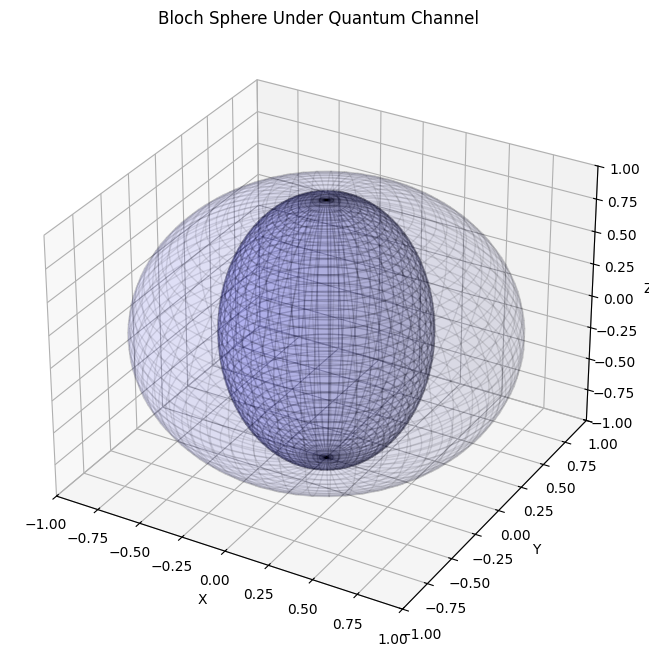

In [7]:
def apply_damping_channel(rho, gamma):

    # define the kraus operators.
    K0 = np.array([[1, 0], [0, np.sqrt(1 - gamma)]])
    K1 = np.array([[0, 0], [0, np.sqrt(gamma)]])

    channel = [K0, K1]

    rho_prime = 0

    # apply all the operators to the state rho.
    for i in channel:
      rho_prime += i @ rho @ i.conj().T

    return rho_prime

# This function is to define the quantum state
def bloch_vector_components(theta, phi, gamma):
    psi = np.array([np.cos(theta/2), np.sin(theta/2) * np.exp(1j*phi)])
    psi_d = np.conjugate(psi)
    rho = np.einsum('i,j->ij', psi, psi_d)  # Outer product for arrays

    # apply the quantum channel to the density matrix.
    rho_prime = apply_damping_channel(rho, gamma)

    # define the u,v,w vectors.
    u = 2 * np.real(rho_prime[0, 1])
    v = 2 * np.imag(rho_prime[1, 0])
    w = rho_prime[0, 0] - rho_prime[1, 1]

    return u, v, w

# Vectorize the function to handle arrays
vectorized_bloch_vector_components = np.vectorize(bloch_vector_components, otypes=[np.float64, np.float64, np.float64])

# Create a grid of theta and phi values
theta = np.linspace(0, np.pi, 50)  # theta ranges from 0 to pi
phi = np.linspace(0, 2 * np.pi, 50)  # phi ranges from 0 to 2*pi
theta, phi = np.meshgrid(theta, phi) # create the grid

# Damping probability
gamma = 0.7  # Increase gamma to see a more noticeable effect

# Compute the vectors
U, V, W = vectorized_bloch_vector_components(theta, phi, gamma)

# This is just the Bloch Sphere under any modification
Uo, Vo, Wo = vectorized_bloch_vector_components(theta, phi, 0.0)

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(U, V, W, color='b', alpha=0.1, edgecolor='k')
ax.plot_surface(Uo, Vo, Wo, color='b', alpha=0.05, edgecolor='k')
# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Bloch Sphere Under Quantum Channel")

# Set limits to visualize the shrinkage
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the plot
plt.show()

# Interactive Way
Use the following code if you want an interactive way to show the Bloch Sphere under the action of a quantum chanel.

In [13]:
def plot_bloch_sphere(gamma):
    U, V, W = vectorized_bloch_vector_components(theta, phi, gamma)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(U, V, W, color='b', alpha=0.1, edgecolor='k')
    ax.plot_surface(Uo, Vo, Wo, color='b', alpha=0.05, edgecolor='k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Bloch Sphere Under Quantum Channel")
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    return fig

gamma_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Gamma:')
widgets.interactive(plot_bloch_sphere, gamma=gamma_slider)

interactive(children=(FloatSlider(value=0.0, description='Gamma:', max=1.0, step=0.01), Output()), _dom_classe…

# Amplitude Damping

The quantum channel, the Kraus operators, for this channel is represented as:

$$  K_1 = \begin{bmatrix} 1 & 0 \\ 0 & \sqrt{1-γ} \end{bmatrix} \hspace{5mm} ; \hspace{5mm} K_2 = \begin{bmatrix} 0 & \sqrt{γ} \\ 0 & 0 \end{bmatrix}$$

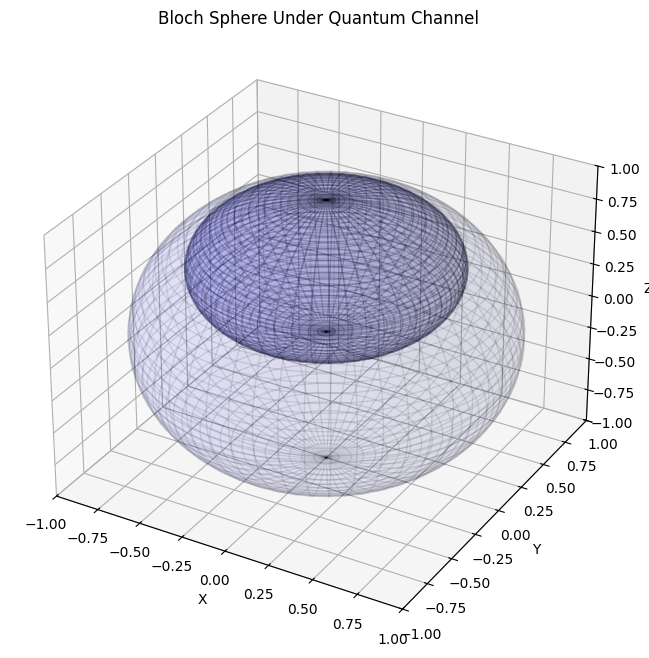

In [15]:
def apply_damping_channel(rho, gamma):

    # define the kraus operators.
    K0 = np.array([[1, 0], [0, np.sqrt(1 - gamma)]])
    K1 = np.array([[0, np.sqrt(gamma)], [0, 0]])

    channel = [K0, K1]

    rho_prime = 0

    # apply all the operators to the state rho.
    for i in channel:
      rho_prime += i @ rho @ i.conj().T

    return rho_prime

# Vectorize the function to handle arrays
vectorized_bloch_vector_components = np.vectorize(bloch_vector_components, otypes=[np.float64, np.float64, np.float64])

# Create a grid of theta and phi values
theta = np.linspace(0, np.pi, 50)  # theta ranges from 0 to pi
phi = np.linspace(0, 2 * np.pi, 50)  # phi ranges from 0 to 2*pi
theta, phi = np.meshgrid(theta, phi) # create the grid

# Damping probability
gamma = 0.5  # Increase gamma to see a more noticeable effect

# Compute the vectors
U, V, W = vectorized_bloch_vector_components(theta, phi, gamma)

# This is just the Bloch Sphere under any modification
Uo, Vo, Wo = vectorized_bloch_vector_components(theta, phi, 0.0)

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(U, V, W, color='b', alpha=0.1, edgecolor='k')
ax.plot_surface(Uo, Vo, Wo, color='b', alpha=0.05, edgecolor='k')
# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Bloch Sphere Under Quantum Channel")

# Set limits to visualize the shrinkage
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the plot
plt.show()

# Depolarising Channel

The quantum channel, the Kraus operators, for this channel is represented as:

$$  K_1 = \sqrt{1-3\gamma/4}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \hspace{5mm} ; \hspace{5mm} K_2 = \sqrt{\gamma/4}\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \hspace{5mm} ; \hspace{5mm} K_3 = \sqrt{\gamma/4}\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \hspace{5mm} ; \hspace{5mm} K_4 = \sqrt{\gamma/4}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

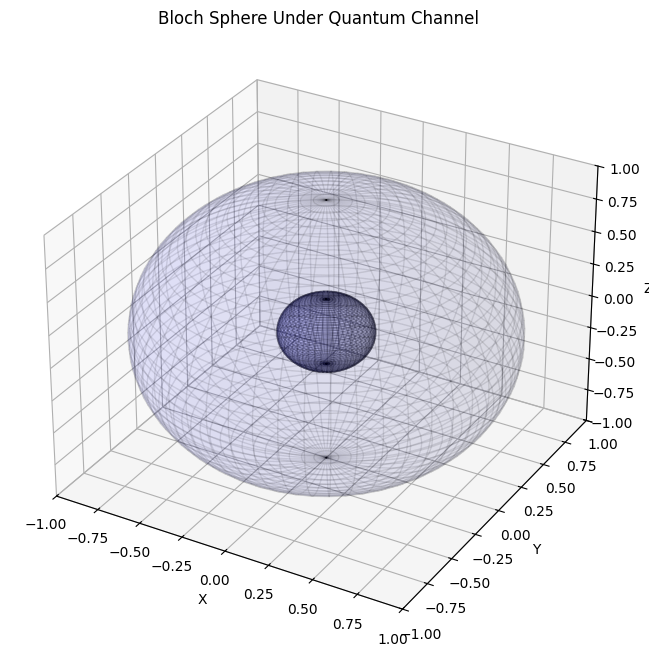

In [19]:
def apply_damping_channel(rho, gamma):

    # define the kraus operators.
    K0 = (np.sqrt(1-3*gamma/4))*np.array([[1, 0], [0, 1]])
    K1 = (np.sqrt(gamma/4))*np.array([[0, 1], [1, 0]])
    K2 = (np.sqrt(gamma/4))*np.array([[0, -1j], [1j, 0]])
    K3 = (np.sqrt(gamma/4))*np.array([[1, 0], [0, -1]])

    channel = [K0, K1, K2, K3]

    rho_prime = 0

    # apply all the operators to the state rho.
    for i in channel:
      rho_prime += i @ rho @ i.conj().T

    return rho_prime

# Vectorize the function to handle arrays
vectorized_bloch_vector_components = np.vectorize(bloch_vector_components, otypes=[np.float64, np.float64, np.float64])

# Create a grid of theta and phi values
theta = np.linspace(0, np.pi, 50)  # theta ranges from 0 to pi
phi = np.linspace(0, 2 * np.pi, 50)  # phi ranges from 0 to 2*pi
theta, phi = np.meshgrid(theta, phi) # create the grid

# Damping probability
gamma = 0.75  # Increase gamma to see a more noticeable effect

# Compute the vectors
U, V, W = vectorized_bloch_vector_components(theta, phi, gamma)

# This is just the Bloch Sphere under any modification
Uo, Vo, Wo = vectorized_bloch_vector_components(theta, phi, 0.0)

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(U, V, W, color='b', alpha=0.1, edgecolor='k')
ax.plot_surface(Uo, Vo, Wo, color='b', alpha=0.05, edgecolor='k')
# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Bloch Sphere Under Quantum Channel")

# Set limits to visualize the shrinkage
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the plot
plt.show()